#### 1인당 전력사용량
- wide 형태 csv 읽어오기. long 형태로 stack.unstack 사용 변환. long형태로 작업
- 경제성장률, 1인당 전력사용향 간의 상관관계.(corrcoef)
- 년도별, 용도별(주택용, 일반용....) 판매전력량(양, 비율)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = '연도별_전력수급_실적_20230405210359_width.csv'
pd_data = pd.read_csv(filename, encoding = 'cp949')
pd_data

,실적구분별(1),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,경제성장률 (%),6.5,3.7,2.3,2.9,3.3,2.6,2.8,3.1,2.7,2.0,-1.0,4.0
1,판매전력량 (백만kWh),434160.0,455070.0,466593.0,474849.0,477592.0,483655.0,497039.0,507746.0,526149.0,520499.0,509270.0,533431.0
2,주택용판매전력량 (백만kWh),63199.0,63523.0,65484.0,65815.0,64457.0,65619.0,68057.0,68544.0,72895.0,72639.0,76303.0,79915.0
3,일반용판매전력량 (백만kWh),97410.0,99504.0,101593.0,102196.0,100761.0,103679.0,108617.0,111298.0,116934.0,116227.0,113639.0,119550.0
4,교육용판매전력량 (백만kWh),7452.0,7568.0,7860.0,7947.0,7438.0,7691.0,8079.0,8316.0,8678.0,8561.0,7515.0,8423.0
5,산업용판매전력량 (백만kWh),232672.0,251491.0,258102.0,265373.0,272552.0,273548.0,278828.0,285970.0,292999.0,289240.0,278660.0,291333.0
6,농사용판매전력량 (백만kWh),10654.0,11232.0,12776.0,13866.0,14505.0,15702.0,16580.0,17251.0,18504.0,18882.0,19029.0,20603.0
7,가로등판매전력량 (백만kWh),3081.0,3145.0,3158.0,3156.0,3221.0,3341.0,3462.0,3557.0,3583.0,3571.0,3507.0,3444.0
8,심야판매전력량 (백만kWh),19690.0,18607.0,17620.0,16496.0,14658.0,14075.0,13416.0,12811.0,12558.0,11379.0,10616.0,10162.0
9,인구1인당전력소비량 (kWh/년),8883.0,9142.0,9331.0,9285.0,9305.0,9555.0,9699.0,9869.0,10195.0,10039.0,9826.0,10330.0


In [9]:
pd_wide = pd_data.set_index('실적구분별(1)').stack().unstack(level = 0)
df4 = pd_wide.reset_index()
df4.columns.name = '' # columns 실적구분별(1) 삭제 
col_names = list(df4.columns)
col_names[0] = '년도'
df4.columns =col_names

df4

,년도,경제성장률 (%),판매전력량 (백만kWh),주택용판매전력량 (백만kWh),일반용판매전력량 (백만kWh),교육용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),가로등판매전력량 (백만kWh),심야판매전력량 (백만kWh),인구1인당전력소비량 (kWh/년)
0,2010,6.5,434160.0,63199.0,97410.0,7452.0,232672.0,10654.0,3081.0,19690.0,8883.0
1,2011,3.7,455070.0,63523.0,99504.0,7568.0,251491.0,11232.0,3145.0,18607.0,9142.0
2,2012,2.3,466593.0,65484.0,101593.0,7860.0,258102.0,12776.0,3158.0,17620.0,9331.0
3,2013,2.9,474849.0,65815.0,102196.0,7947.0,265373.0,13866.0,3156.0,16496.0,9285.0
4,2014,3.3,477592.0,64457.0,100761.0,7438.0,272552.0,14505.0,3221.0,14658.0,9305.0
5,2015,2.6,483655.0,65619.0,103679.0,7691.0,273548.0,15702.0,3341.0,14075.0,9555.0
6,2016,2.8,497039.0,68057.0,108617.0,8079.0,278828.0,16580.0,3462.0,13416.0,9699.0
7,2017,3.1,507746.0,68544.0,111298.0,8316.0,285970.0,17251.0,3557.0,12811.0,9869.0
8,2018,2.7,526149.0,72895.0,116934.0,8678.0,292999.0,18504.0,3583.0,12558.0,10195.0
9,2019,2.0,520499.0,72639.0,116227.0,8561.0,289240.0,18882.0,3571.0,11379.0,10039.0


In [10]:
# 상관관계

sub_df = pd_wide[['경제성장률 (%)', '인구1인당전력소비량 (kWh/년)']].to_numpy()

corr = np.corrcoef(sub_df[:, 0], sub_df[:,1])[0,1]

corr

-0.41398775995325837

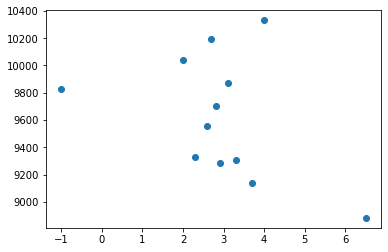

In [14]:
# 상관관계를 Series로 받아서 반환하는 것

np.corrcoef(df4['경제성장률 (%)'], df4['인구1인당전력소비량 (kWh/년)'])[0,1] # columns를 한글로 주면 오타나기 쉽다.

# column_name가 길면 오타나기 쉬워서 index로 받아오는 것이 조금 더 쉽다.

x = df4.iloc[:, 1] # == df4['경제성장률 (%)']
y = df4.iloc[:, -1] # == df4['인구1인당전력소비량 (kWh/년)']
np.corrcoef(x, y)[0, 1]

_,axe = plt.subplots()
axe.scatter(x, y) # 상관도가 없다.

In [22]:
df5 = df4.set_index('년도')
df6 = df5.iloc[:, 1:-1]
df6.columns = ['전체판매량', '주택', '일반', '교육', '산업', '농사', '가로등', '심야']
df6.stack()

년도         
2010  전체판매량    434160.0
      주택        63199.0
      일반        97410.0
      교육         7452.0
      산업       232672.0
                 ...   
2021  교육         8423.0
      산업       291333.0
      농사        20603.0
      가로등        3444.0
      심야        10162.0
Length: 96, dtype: float64

In [31]:
#df6.iloc[:, 1:] / df6.iloc[:, 0]
elements = df6.iloc[:, 1:]
total = df6.iloc[:, 0]
# elements / total --< error shape이 안 맞아서 broadingcasting 안된다. (12,7) / (12,)
            # broadingcasting가 되려면 오른쪽 부터 숫자가 맞아 들어가야한다.
            # elements를 .T 해서 맞춰준다.
            # elements.T / total해주고 그 값을 다시 .T 해주면 된다.
print(elements.shape)
print(total.shape)

elements2 = elements.T
print(elements2.shape)

ratio_result = elements2 / total
ratio_result.T * 100

(12, 7)
(12,)
(7, 12)


,주택,일반,교육,산업,농사,가로등,심야
년도,,,,,,,
2010,14.556615,22.436429,1.716418,53.591303,2.453934,0.709646,4.535194
2011,13.958951,21.865647,1.663041,55.264245,2.468192,0.691102,4.088821
2012,14.034501,21.773366,1.684552,55.316304,2.738147,0.676821,3.776310
2013,13.860196,21.521789,1.673585,55.885766,2.920086,0.664632,3.473946
2014,13.496248,21.097715,1.557396,57.067958,3.037111,0.674425,3.069147
2015,13.567316,21.436561,1.590183,56.558497,3.246529,0.690782,2.910132
2016,13.692487,21.852812,1.625426,56.097811,3.335754,0.696525,2.699185
2017,13.499663,21.920015,1.637827,56.321468,3.397565,0.700547,2.523112
2018,13.854440,22.224503,1.649343,55.687457,3.516874,0.680986,2.386776


In [33]:
# 위에 식을 한줄로 해보자
((df6.iloc[:, 1:].T / df6['전체판매량']).T)*100

,주택,일반,교육,산업,농사,가로등,심야
년도,,,,,,,
2010,14.556615,22.436429,1.716418,53.591303,2.453934,0.709646,4.535194
2011,13.958951,21.865647,1.663041,55.264245,2.468192,0.691102,4.088821
2012,14.034501,21.773366,1.684552,55.316304,2.738147,0.676821,3.776310
2013,13.860196,21.521789,1.673585,55.885766,2.920086,0.664632,3.473946
2014,13.496248,21.097715,1.557396,57.067958,3.037111,0.674425,3.069147
2015,13.567316,21.436561,1.590183,56.558497,3.246529,0.690782,2.910132
2016,13.692487,21.852812,1.625426,56.097811,3.335754,0.696525,2.699185
2017,13.499663,21.920015,1.637827,56.321468,3.397565,0.700547,2.523112
2018,13.854440,22.224503,1.649343,55.687457,3.516874,0.680986,2.386776
